In [46]:
import pandas as pd
import matplotlib.pyplot as plt

In [47]:
ipl = pd.read_csv(r'ipl-matches.csv')

In [53]:
ipl.head()

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,N,Gujarat Titans,Wickets,7.0,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,N,Punjab Kings,Wickets,5.0,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan


In [54]:
ipl.info()

<class 'pandas.core.frame.DataFrame'>
Index: 932 entries, 0 to 949
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               932 non-null    int64  
 1   City             884 non-null    object 
 2   Date             932 non-null    object 
 3   Season           932 non-null    object 
 4   MatchNumber      932 non-null    object 
 5   Team1            932 non-null    object 
 6   Team2            932 non-null    object 
 7   Venue            932 non-null    object 
 8   TossWinner       932 non-null    object 
 9   TossDecision     932 non-null    object 
 10  SuperOver        932 non-null    object 
 11  WinningTeam      932 non-null    object 
 12  WonBy            932 non-null    object 
 13  Margin           932 non-null    float64
 14  method           19 non-null     object 
 15  Player_of_Match  932 non-null    object 
 16  Team1Players     932 non-null    object 
 17  Team2Players     932 

In [55]:
ipl.describe()

,ID,Margin
count,9.320000e+02,932.000000
mean,8.288613e+05,17.056867
std,3.379820e+05,21.633109
min,3.359820e+05,1.000000
25%,5.012588e+05,6.000000
50%,8.297320e+05,8.000000
75%,1.175369e+06,19.000000
max,1.312200e+06,146.000000


In [56]:
# missing values

ipl.isnull().sum()

ID                   0
City                48
Date                 0
Season               0
MatchNumber          0
Team1                0
Team2                0
Venue                0
TossWinner           0
TossDecision         0
SuperOver            0
WinningTeam          0
WonBy                0
Margin               0
method             913
Player_of_Match      0
Team1Players         0
Team2Players         0
Umpire1              0
Umpire2              0
dtype: int64

## bar

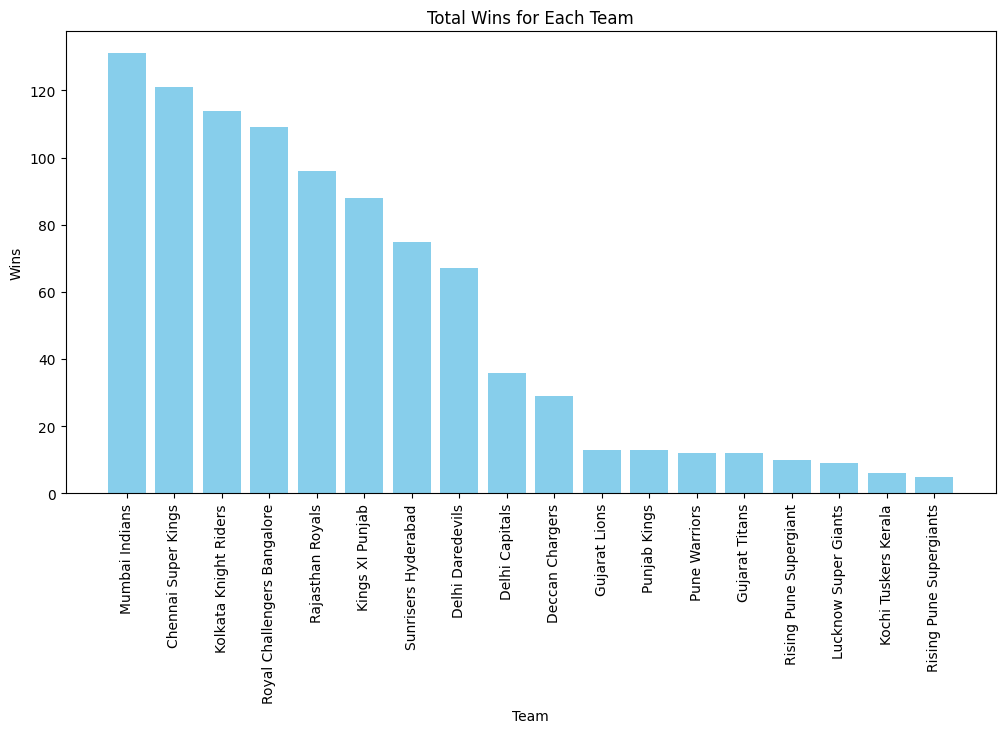

In [48]:
wins_count = ipl['WinningTeam'].value_counts()

plt.figure(figsize=(12, 6))
plt.bar(wins_count.index, wins_count.values, color='skyblue')

plt.title("Total Wins for Each Team")
plt.xlabel("Team")
plt.ylabel("Wins")
plt.xticks(rotation=90)
plt.show()


## scatter

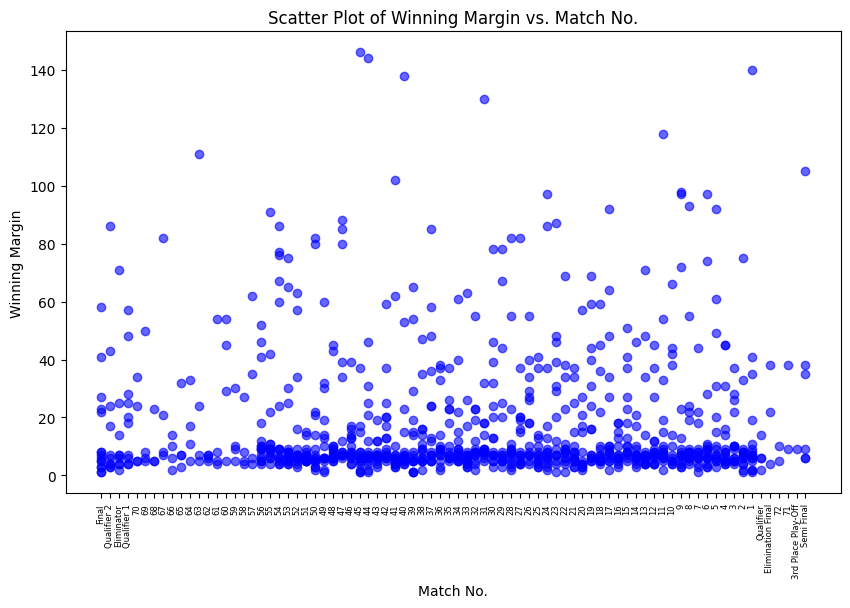

In [49]:
plt.figure(figsize=(10, 6))
plt.scatter(ipl['MatchNumber'], ipl['Margin'], c='blue', alpha=0.6)
plt.title('Scatter Plot of Winning Margin vs. Match No.')
plt.xlabel('Match No.')
plt.ylabel('Winning Margin')

plt.xticks(fontsize=6) 
plt.xticks(rotation=90)

plt.show()


## box

<Figure size 1000x600 with 0 Axes>

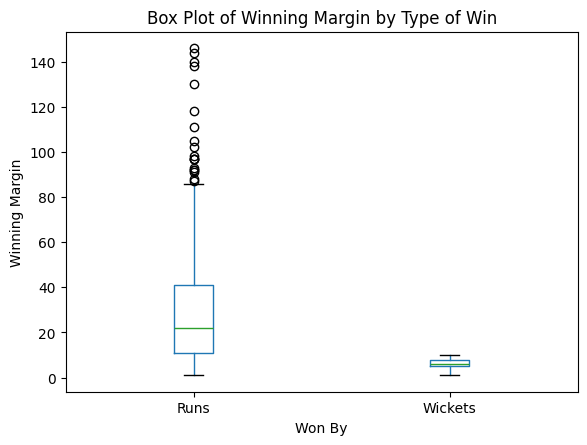

In [50]:
plt.figure(figsize=(10, 6))
ipl.dropna(subset=['WonBy', 'Margin'], inplace=True)  

ipl.boxplot(column='Margin', by='WonBy', grid=False)
plt.title('Box Plot of Winning Margin by Type of Win')
plt.suptitle('')
plt.xlabel('Won By')
plt.ylabel('Winning Margin')
plt.show()


## line

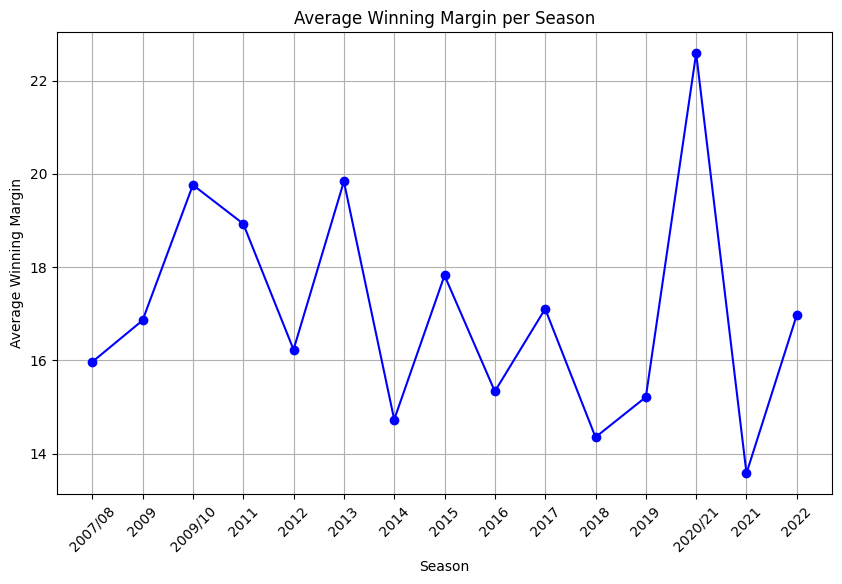

In [51]:
avg_margin_per_season = ipl.groupby('Season')['Margin'].mean()

plt.figure(figsize=(10, 6))
plt.plot(avg_margin_per_season.index, avg_margin_per_season.values, marker='o', linestyle='-', color='b')

plt.title('Average Winning Margin per Season')
plt.xlabel('Season')
plt.ylabel('Average Winning Margin')
plt.xticks(rotation=45) 
plt.grid(True) 
plt.show()


## pie

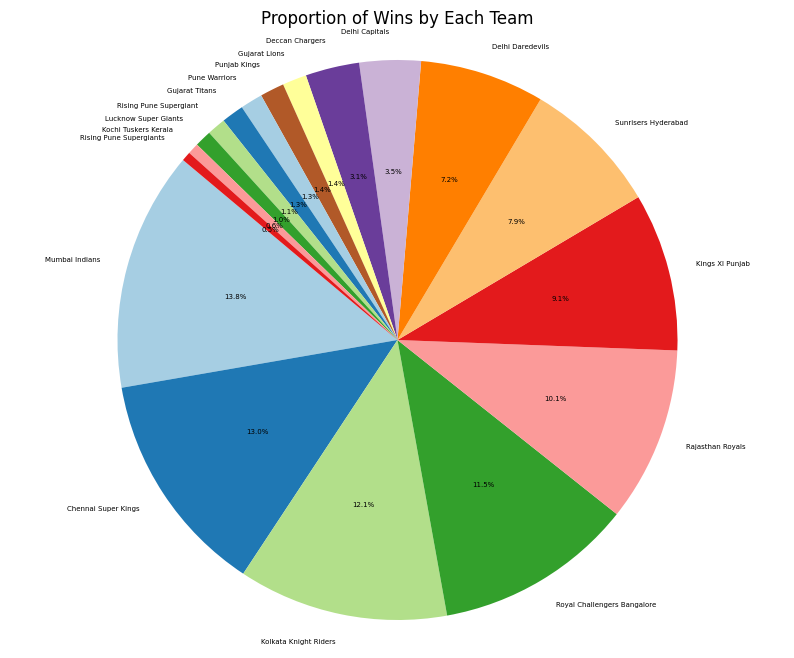

In [52]:
wins_count = ipl['WinningTeam'].value_counts()

plt.figure(figsize=(10, 8))
plt.pie(wins_count, labels=wins_count.index, autopct='%1.1f%%',
        startangle=140, colors=plt.cm.Paired.colors, textprops={'fontsize': 5})
plt.title('Proportion of Wins by Each Team')
plt.axis('equal') 
plt.show()